## Part I - Applying K-Means Clustering and Hierarchical Clustering on Wine Data

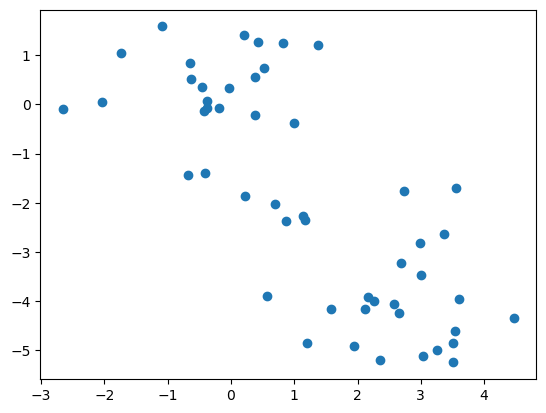

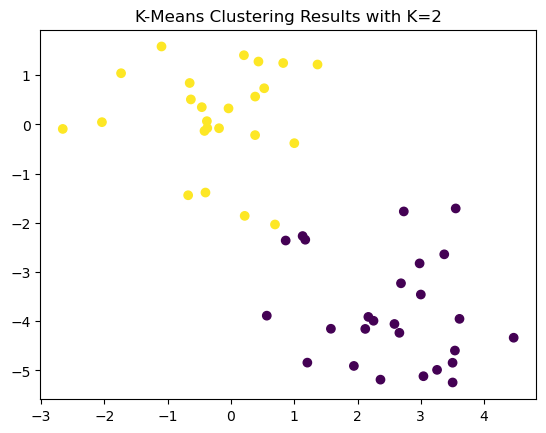

Cluster output: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1]


In [1]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(2)
x = np.random.normal(size=(50, 2))
x[:25, 0] += 3
x[:25, 1] -= 4

plt.scatter(x[:, 0], x[:, 1])
plt.show()

#Kmeans
km_out = KMeans(n_clusters=2, n_init=20).fit(x)
km_labels = km_out.labels_
km_labels[km_labels==0] = 2
km_labels[km_labels==1] = 1


plt.scatter(x[:, 0], x[:, 1], c=km_out.labels_+1)
plt.title("K-Means Clustering Results with K=2")
plt.xlabel("")
plt.ylabel("")
plt.show()
print("Cluster output:", km_labels)

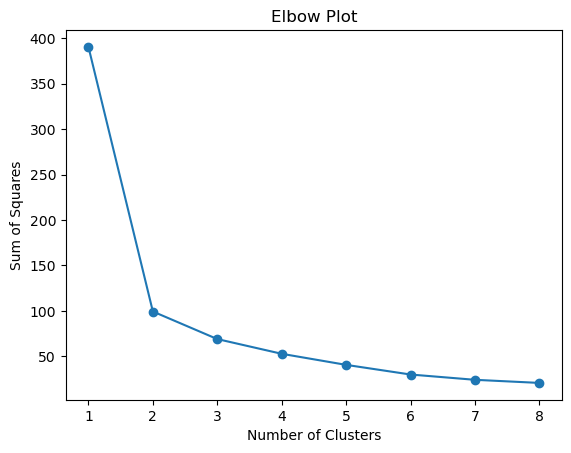

In [2]:
#elbow plot
ss = []  #sum of squares
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=20).fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 9), ss, 'o-')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.xticks(range(1, 9))
plt.show()

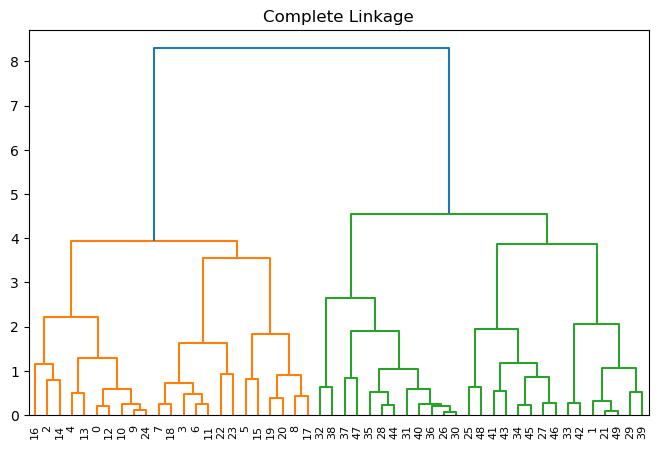

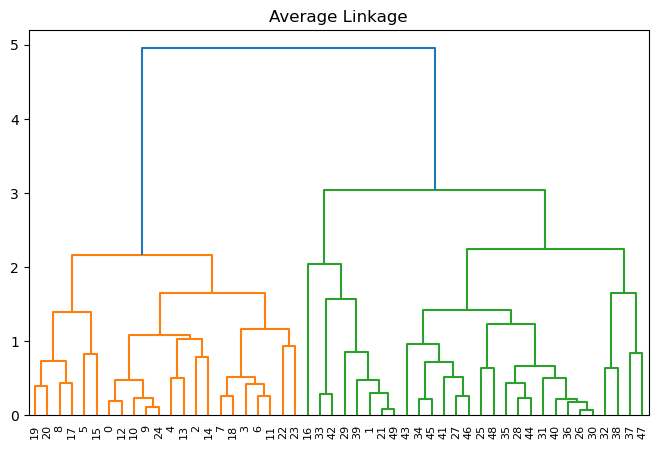

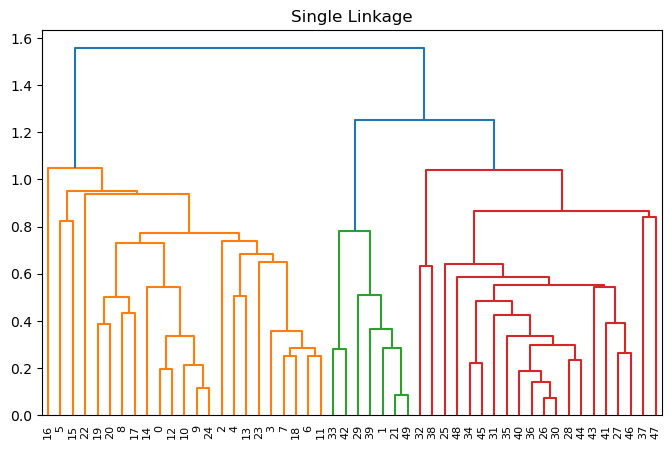

In [3]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
# complete linkage
hc_complete = linkage(pdist(x), method='complete')
plt.figure(figsize=(8, 5))
plt.title('Complete Linkage')
dendrogram(hc_complete)
plt.show()

# average linkage
hc_average = linkage(pdist(x), method='average')
plt.figure(figsize=(8, 5))
plt.title('Average Linkage')
dendrogram(hc_average)
plt.show()

# single linkage
hc_single = linkage(pdist(x), method='single')
plt.figure(figsize=(8, 5))
plt.title('Single Linkage')
dendrogram(hc_single)
plt.show()


In [4]:
# compare with KMeans clustering

hc_complete_clusters = fcluster(hc_complete, 2, criterion='maxclust')
hc_average_clusters = fcluster(hc_average, 2, criterion='maxclust')
hc_single_clusters = fcluster(hc_single, 2, criterion='maxclust')

print("Complete linkage output:",hc_complete_clusters)
print("Average linkage output:",hc_average_clusters)
print("Single linkage output:",hc_single_clusters)
print("K-Means cluster output:", km_labels)

# calculate differences
complete_diff = np.sum(hc_complete_clusters != km_labels)
average_diff = np.sum(hc_average_clusters != km_labels)
single_diff = np.sum(hc_single_clusters != km_labels)

print('Complete Linkage difference:', complete_diff)
print('Average Linkage difference:', average_diff)
print('Single Linkage difference:', single_diff)

Complete linkage output: [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
Average linkage output: [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
Single linkage output: [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
K-Means cluster output: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1]
Complete Linkage difference: 3
Average Linkage difference: 4
Single Linkage difference: 3


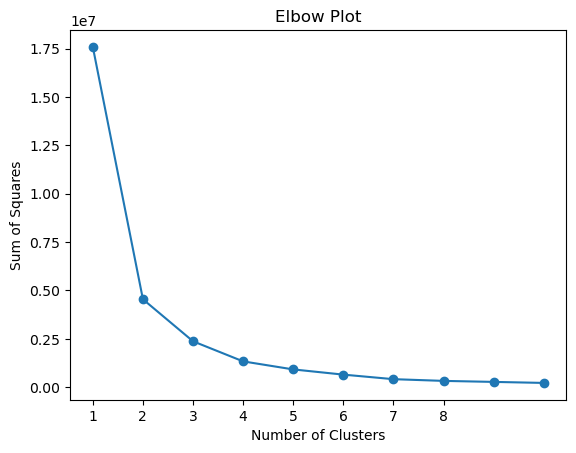

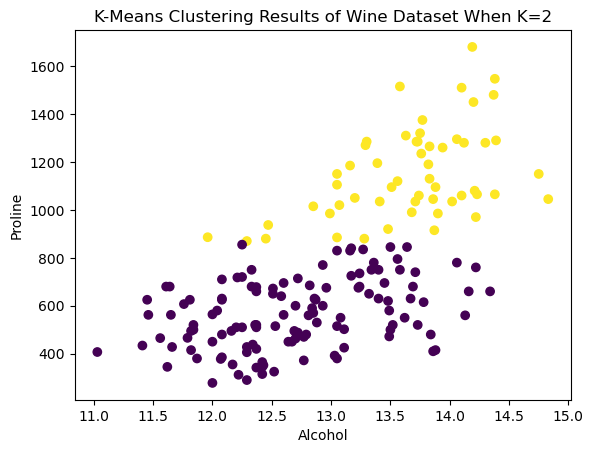

In [5]:
 
from sklearn.datasets import load_wine
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
#elbow plot
ss = []  #sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=20).fit(wine_df)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11), ss, 'o-')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.xticks(range(1, 9))
plt.show()

#elbow curves at 2, hence 2 clusters

kmeans = KMeans(n_clusters=2)
kmeans.fit(wine_df)
wine_df['cluster'] = kmeans.labels_

plt.scatter(wine_df['alcohol'],wine_df['proline'], c=wine_df['cluster'], cmap='viridis')
plt.title('K-Means Clustering Results of Wine Dataset When K=2')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.show()



In [6]:
#Limitations observed with these two methods

print("1.K-means is sensitive to outliers, as outliers can significantly affect the position of the centroids and the resulting clusters.\n")
print("2.The number of clusters (k) is a hyperparameter that needs to be set before running the algorithm. It can be difficult to choose the optimal value of k, elbow method and silhouette analysis help estimate the optimal k value.\n")
print("3.Hierarchical clustering assumes that the data can be represented as a tree-like structure, which might not be true for all datasets \n")
print("4.The dendrogram generated by hierarchical clustering can be difficult to interpret, especially when the dataset has many samples or the clusters are nested.\n")

1.K-means is sensitive to outliers, as outliers can significantly affect the position of the centroids and the resulting clusters.

2.The number of clusters (k) is a hyperparameter that needs to be set before running the algorithm. It can be difficult to choose the optimal value of k, elbow method and silhouette analysis help estimate the optimal k value.

3.Hierarchical clustering assumes that the data can be represented as a tree-like structure, which might not be true for all datasets 

4.The dendrogram generated by hierarchical clustering can be difficult to interpret, especially when the dataset has many samples or the clusters are nested.



## Part 2: Decision Trees






#### Apply Decision Trees On Diabetes Data

Medical data can be sensitive, with consequential outcomes for patients and research. Especially if there are inequities in the medical systems, access to healthcare, way of collecting data, and generalizing data from one population to another. These are important things to keep in mind when dealing with any dataset.



In [8]:
# Loaded the data set
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Selected features
# Ideally we would select features in consultation with a domain expert. Since that is not always possible, there are methods for identifying the most relevant featuers. As a start, we will select all but the outcome variable.
x = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [10]:
print("I think Glucose, Insulin, and DiabetesPedigreeFunction would be the most predictive features. I think Glucose would be the root of the tree")

I think Glucose, Insulin, and DiabetesPedigreeFunction would be the most predictive features. I think Glucose would be the root of the tree


In [11]:
# Loaded libraries for applying decision trees

from sklearn.tree import DecisionTreeClassifier # Imported Decision Tree Classifier
from sklearn import tree

from sklearn.model_selection import train_test_split # Imported train_test_split function

from sklearn import metrics #Imported scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


In [12]:
# Set up training and test variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Created Decision Tree classifer object
model = DecisionTreeClassifier()

# Trained Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predicted the response for test dataset
y_pred = model.predict(x_test)

In [13]:
# Evaluating Results

print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        99
           1       0.53      0.53      0.53        55

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154

Accuracy: 66.23376623376623


array([[73, 26],
       [26, 29]])

#### Visualizing Decision Trees

One of the advantages of decision trees is that they are easier to interpret, especially when you can visualize them.
 

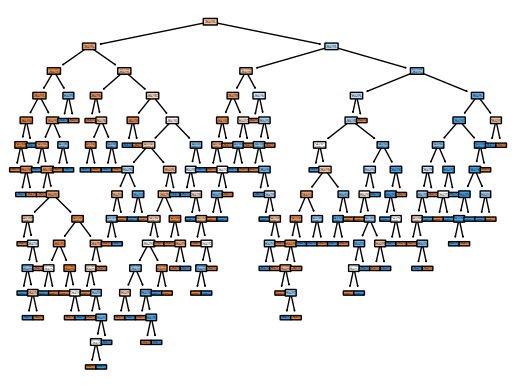

The root node of the decision tree is feature 1 i.e Glucose. This was predicted correctly
These are the top three features 1 7 5 i.e Glucose, BMI, Age


In [14]:
# Plot the decision tree
tree.plot_tree(model, filled=True, rounded=True)
plt.show()
root_node = model.tree_.feature[0]
print(f"The root node of the decision tree is feature {root_node} i.e Glucose. This was predicted correctly")
print("These are the top three features",model.tree_.feature[0],model.tree_.feature[1],model.tree_.feature[2],"i.e Glucose, BMI, Age")

#### Improving our model 

In [15]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# Created a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Trained the classifier on the training data
rf.fit(x_train, y_train)

# Making predictions on the testing data
y_pred = rf.predict(x_test)

# Evaluating the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("RF Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))

#AdaBoost

ab = AdaBoostClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
ab.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = ab.predict(x_test)

# Evaluating the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)
print(confusion_matrix(y_test,y_pred))


#Varying the maximum depth
print("Accuracy at different depths")

for max_depth in range(1, 10):
    # Created Decision Tree classifier object with a specific maximum depth
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=1)

    # Trained Decision Tree classifier
    model = model.fit(x_train, y_train)

    # Predicted the response for test dataset
    y_pred = model.predict(x_test)

    # Evaluated the performance 
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max depth = {max_depth}, Accuracy = {accuracy}")

RF Accuracy: 0.8051948051948052
[[88 11]
 [19 36]]
AdaBoost Accuracy: 0.7792207792207793
[[84 15]
 [19 36]]
Accuracy at different depths
Max depth = 1, Accuracy = 0.7337662337662337
Max depth = 2, Accuracy = 0.7987012987012987
Max depth = 3, Accuracy = 0.7857142857142857
Max depth = 4, Accuracy = 0.7727272727272727
Max depth = 5, Accuracy = 0.7337662337662337
Max depth = 6, Accuracy = 0.7662337662337663
Max depth = 7, Accuracy = 0.7012987012987013
Max depth = 8, Accuracy = 0.7142857142857143
Max depth = 9, Accuracy = 0.6688311688311688


## Part 3: Fake News and Naive Bayes 

For this part, I am going to apply Naive Bayes to a data set used in a recent [Kaggle competition](https://www.kaggle.com/competitions/fake-news/data). The goal of the competition is to build a classifer that could predict whether a news story is fake or true. 


In [64]:
# Read in training data
TrainingData = pd.read_csv('train.csv')
TrainingData.isnull().sum()
TrainingData = TrainingData.dropna()
TrainingData.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [65]:
# Extracted features
features = TrainingData[['author', 'title', 'text']]


In [66]:
# Ran the NB classifier using cross validation

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Created a pipeline that vectorizes the text data and trains an NB classifier
pipeline = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Evaluated the pipeline using cross-validation
scores = cross_val_score(pipeline, features['text'], TrainingData['label'], cv=5)


In [67]:
# Reporting Accuracy
print('Accuracy:', scores.mean())

Accuracy: 0.717418649165983


In [68]:
# Running the classifer on the test data.

testData = pd.read_csv('test.csv')
testData = testData.dropna()

# Extracting the text feature
testFeatures = testData['text']

# Making predictions on the test data using the trained pipeline
pipeline.fit(features['text'], TrainingData['label'])
predictions = pipeline.predict(testFeatures)

#first 10 
print(predictions[1:10])


[0 0 1 0 0 0 0 0 1]


In [69]:

print("I can improve the accuracy using the following ways:\n Use a better tokenizer - The tokenizer is responsible for splitting the text into tokens, and it can significantly impact the accuracy of TF-IDF. A better tokenizer can capture more relevant information, such as multi-word expressions, collocations, and named entities. One popular tokenizer is the NLTK library.\nRemove stop words - Stop words are common words like the, and, a, which do not carry significant meaning.Removing stop words can improve the accuracy of TF-IDF by reducing noise and increasing the relevance of the remaining terms.\nStemming and Lemmatization - Stemming and lemmatization are techniques used to reduce words to their root form. For example, running, runs, and ran would all be reduced to run. This helps to reduce the dimensionality of the data and capture more accurate word frequency.\nDocument preprocessing - Preprocessing the documents by removing special characters, punctuations, and converting all words to lowercase can help improve the accuracy of TF-IDF.\nUsing IDF smoothing - IDF (Inverse Document Frequency) values can be smoothed by adding a constant to avoid division by zero or negative values. This technique can help to mitigate the effects of rare terms that may have a high IDF value but low relevance.")


Use a better tokenizer - The tokenizer is responsible for splitting the text into tokens, and it can significantly impact the accuracy of TF-IDF. A better tokenizer can capture more relevant information, such as multi-word expressions, collocations, and named entities. One popular tokenizer is the NLTK library.
Remove stop words - Stop words are common words like the, and, a, which do not carry significant meaning.Removing stop words can improve the accuracy of TF-IDF by reducing noise and increasing the relevance of the remaining terms.
Stemming and Lemmatization - Stemming and lemmatization are techniques used to reduce words to their root form. For example, running, runs, and ran would all be reduced to run. This helps to reduce the dimensionality of the data and capture more accurate word frequency.
Document preprocessing - Preprocessing the documents by removing special characters, punctuations, and converting all words to lowercase can help improve the accuracy of TF-IDF.
Using I

In [76]:


print("Imrpoving the accuracy by removing stop words like a, and, the..")

import nltk
from nltk.corpus import stopwords

# Downloaded the stop words 
nltk.download('stopwords')

# Getting the stop words for the English language
stop_words = set(stopwords.words('english'))

# Created a pipeline that vectorizes the text data, removes stop words, and trains an NB classifier
pipeline1 = Pipeline([
    ('vect', TfidfVectorizer(stop_words=stop_words)),
    ('clf', MultinomialNB())
])
# Evaluated the pipeline using cross-validation
scores1 = cross_val_score(pipeline1, features['text'], TrainingData['label'], cv=5)
print('Accuracy:', scores1.mean())

I can improve the accuracy by removing stop words like a, and, the..


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishadoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.7713426305715068
